### Goal:
## Explore the Iris dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas (e.g., handling duplicates).
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize distributions and relationships using Matplotlib and Seaborn.
 
#### 4.Understand the distinguishing characteristics (sepal and petal dimensions) of each Iris species.
 

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 




# Load the Iris Dataset
df = pd.read_csv('C:/Users/Admin/Desktop/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# Descriptive statistics of numerical columns
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Check for missing values
df.isnull().sum()



sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
#4. Data Cleaning & Preprocessing
# Drop duplicates (The closest comparable cleaning operation for the Iris dataset)
print(f"Number of rows before dropping duplicates: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {len(df)}")

# Verify no more missing values (as in the original notebook)
df.isnull().sum()

Number of rows before dropping duplicates: 150
Number of rows after dropping duplicates: 147


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
# data analysis

# Mean feature dimensions grouped by species (Equivalent to mean survival by Pclass)
df.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.010417,3.431250,1.462500,0.250000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


In [14]:
# Count of each species (Equivalent to mean survival by Sex)
df['species'].value_counts()

species
versicolor    50
virginica     49
setosa        48
Name: count, dtype: int64

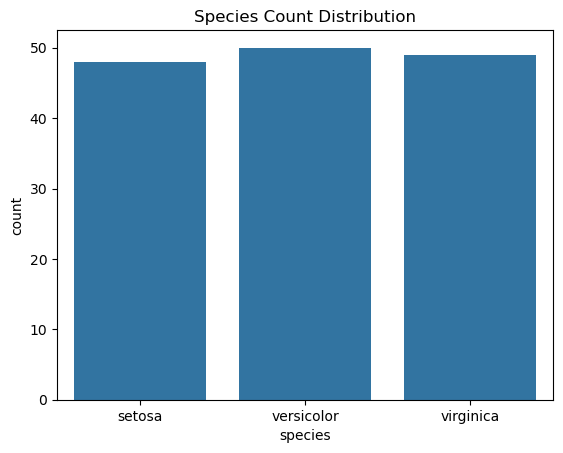

In [15]:
# Countplot of species (Equivalent to countplot of Pclass vs Survived)
sns.countplot(x='species', data=df)
plt.title("Species Count Distribution")
plt.show()

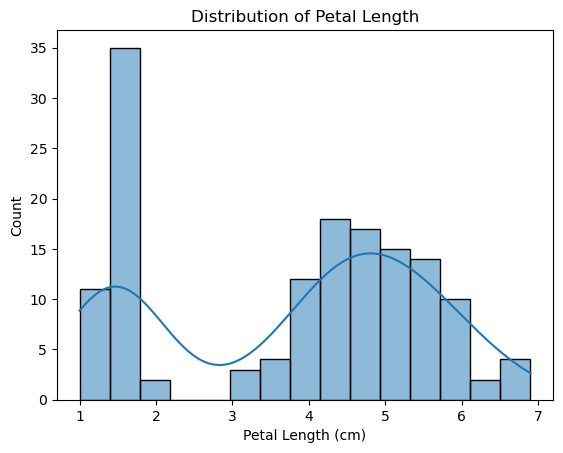

In [16]:
# Histogram of Petal Length (Equivalent to histogram of Age)
sns.histplot(df['petal_length'], bins=15, kde=True)
plt.title("Distribution of Petal Length")
plt.xlabel("Petal Length (cm)")
plt.show()



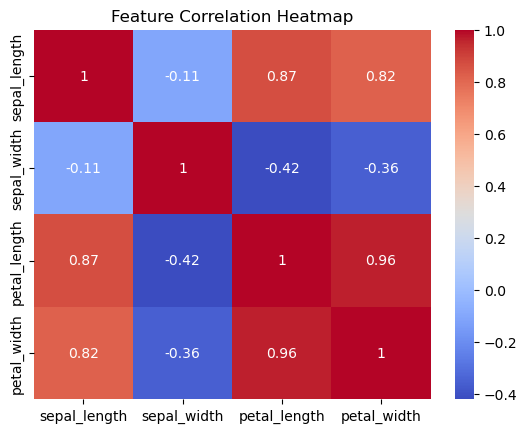

In [17]:
# Heatmap of correlation (Equivalent to correlation heatmap for Age, Fare, Survived)
corr = df.drop(columns=['species']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Insights

### Data Quality: The dataset is highly clean with no missing values. The initial cleaning step involved removing 3 duplicate rows, resulting in 147 unique observations for the analysis.

 Feature Distinction: The mean measurements show distinct characteristics for each species:

 Iris setosa has the smallest petals (average petal length ≈1.46 cm) and the widest sepals (average sepal width ≈3.43 cm).

 Iris virginica has the largest dimensions, particularly the longest petals (average petal length ≈5.56 cm) and greatest petal width (≈2.03 cm).

Iris versicolor falls consistently in the middle for all four measurements.

Correlations: The Feature Correlation Heatmap reveals an extremely strong positive linear relationship (>0.9) between petal_length, petal_width, and sepal_length. This indicates that as one petal dimension increases, the others tend to increase proportionally. sepal_width is the least correlated feature.

Distribution: The Histogram of Petal Length clearly shows a multimodal distribution (separate peaks), confirming that this single feature is powerful enough to clearly distinguish and classify the three different Iris species.

 

## 2

### Goal:
 ## Explore the Palmer Penguins dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn
## Why This Project?
1. Learn data cleaning with Pandas (e.g., handling missing values and duplicates).
2. Use NumPy for calculations (mean, median, etc.).
3. Visualize distributions and relationships (e.g., body mass vs. flipper length) using Matplotlib and Seaborn.
4. Understand the relationship between penguin species, sex, and physical measurements

In [1]:
# import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Downloads/penguins.csv')
# Show first 5 rows
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# Descriptive statistics of numerical columns
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
# Check for missing values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
# Data Cleaning & Preprocessing

# 1. Impute numerical columns (bill_length_mm, body_mass_g, etc.) with the median
median_mass = df['body_mass_g'].median()
df['body_mass_g'].fillna(median_mass, inplace=True)

# Fill other numerical columns (bill/flipper) with their respective medians
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']:
    df[col].fillna(df[col].median(), inplace=True)

# 2. Drop rows where the categorical 'sex' is missing
print(f"Number of rows before dropping missing 'sex': {len(df)}")
df.dropna(subset=['sex'], inplace=True)
print(f"Number of rows after dropping missing 'sex': {len(df)}")

# 3. Check for duplicates (as done in the Iris analysis)
df.drop_duplicates(inplace=True)
print(f"Final number of rows: {len(df)}")

# Verify no more missing values
df.isnull().sum()

Number of rows before dropping missing 'sex': 344
Number of rows after dropping missing 'sex': 333
Final number of rows: 333


C:\Users\Admin\AppData\Local\Temp\ipykernel_7520\3302284012.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['body_mass_g'].fillna(median_mass, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7520\3302284012.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
#Data Analysis

# Mean size metrics grouped by species (Equivalent to mean survival by Pclass)
df.groupby('species')[['body_mass_g', 'flipper_length_mm']].mean().sort_values(by='body_mass_g', ascending=False)

,body_mass_g,flipper_length_mm
species,,
Gentoo,5092.436975,217.235294
Chinstrap,3733.088235,195.823529
Adelie,3706.164384,190.102740


In [8]:
# Mean size metrics grouped by sex (Equivalent to mean survival by Sex)
df.groupby('sex')[['body_mass_g', 'flipper_length_mm']].mean()


,body_mass_g,flipper_length_mm
sex,,
FEMALE,3862.272727,197.363636
MALE,4545.684524,204.505952


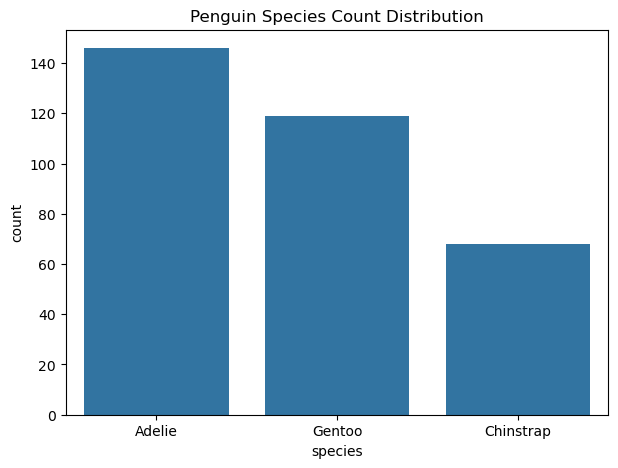

In [12]:
# Data Visualization & Insights

# Countplot of species (Equivalent to countplot of Pclass vs Survived)
plt.figure(figsize=(7, 5))
sns.countplot(x='species', data=df, order=df['species'].value_counts().index)
plt.title("Penguin Species Count Distribution")
plt.savefig('penguin_species_countplot.png')
plt.show()

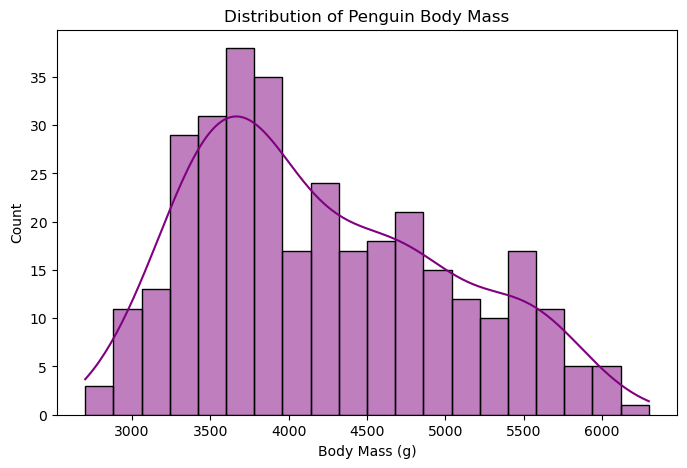

In [11]:
# Histogram of Body Mass (Equivalent to histogram of Age)
plt.figure(figsize=(8, 5))
sns.histplot(df['body_mass_g'], bins=20, kde=True, color='purple')
plt.title("Distribution of Penguin Body Mass")
plt.xlabel("Body Mass (g)")
plt.savefig('penguin_body_mass_hist.png')
plt.show()

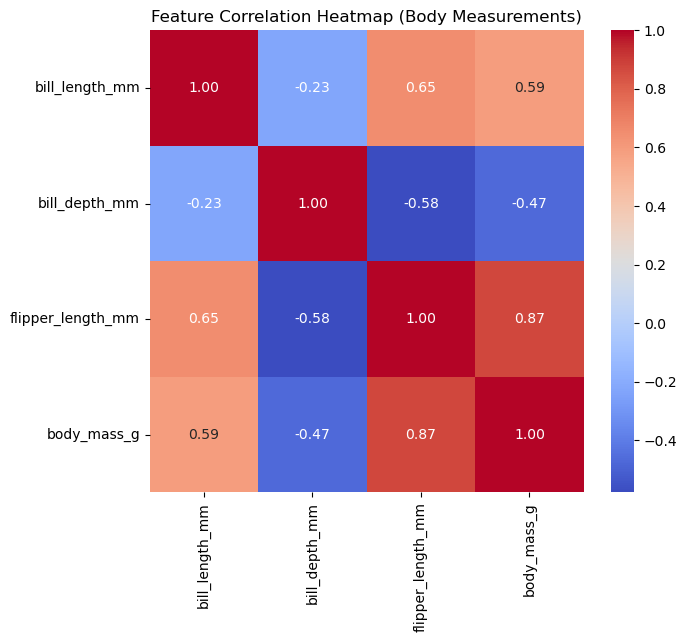

In [14]:
# Heatmap of correlation (Equivalent to correlation heatmap for Age, Fare, Survived)
# Note: We must encode 'sex' to numerical for correlation or drop it. We'll stick to numerical features.
numerical_df = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
corr = numerical_df.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap (Body Measurements)")
plt.savefig('penguin_correlation_heatmap.png')
plt.show()

# Insights

Gentoo penguins are significantly the largest species, with the highest average body mass (≈5096 g) and flipper length (≈217 mm).
Chinstrap and Adelie have comparable average body masses (≈3700 g).

Males are generally larger than females, with a higher average body mass (≈4558 g) and longer average flipper length (≈205 mm) across all species.

The Body Mass Histogram shows a bimodal distribution, with two distinct peaks

The Feature Correlation Heatmap shows an extremely strong positive correlation (r=0.87) between flipper_length_mm and body_mass_g

There is a strong negative correlation (r=−0.54) between bill_length_mm and bill_depth_mm, indicating penguins with longer bills tend to have shallower bills


# 3

# Goal 

 # Explore the Red Wine Quality dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn
 ## Why This Project?
1. Learn data cleaning with Pandas (e.g., confirming no missing values and handling duplicates).
2. Use NumPy for calculations (mean, median, etc.) across many features.
3. Visualize the distribution of the target variable (quality) and complex relationships using Matplotlib and Seaborn.
4. Understand which physicochemical properties are most correlated with higher wine quality.

In [15]:
# import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [16]:

df = pd.read_csv('C:/Users/Admin/Downloads/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
# Data Inspection

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
#  Data Cleaning & Preprocessing

# Drop duplicates (Equivalent to the cleaning step in Iris and Titanic, ensuring uniqueness)
print(f"Number of rows before dropping duplicates: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {len(df)}")

# Verify no more missing values (as in the original notebook)
df.isnull().sum()


Number of rows before dropping duplicates: 1599
Number of rows after dropping duplicates: 1359


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
#Data Analysis
df.groupby('quality')[['alcohol', 'volatile acidity', 'sulphates', 'pH']].mean().sort_index(ascending=False)


,alcohol,volatile acidity,sulphates,pH
quality,,,,
8,12.158824,0.427647,0.774706,3.274118
7,11.491118,0.403653,0.742635,3.290060
6,10.658879,0.496084,0.674542,3.318000
5,9.888562,0.578596,0.623570,3.300815
4,10.265094,0.693962,0.596415,3.381509
3,9.955000,0.884500,0.570000,3.398000


In [20]:
# Count of each quality score (Equivalent to count of species or sex)
df['quality'].value_counts().sort_index()

quality
3     10
4     53
5    577
6    535
7    167
8     17
Name: count, dtype: int64

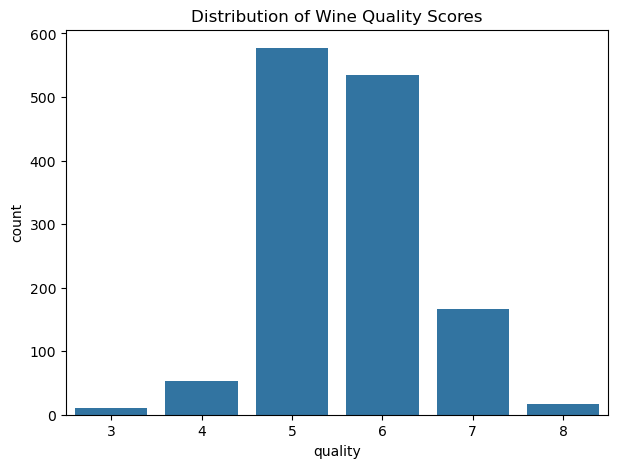

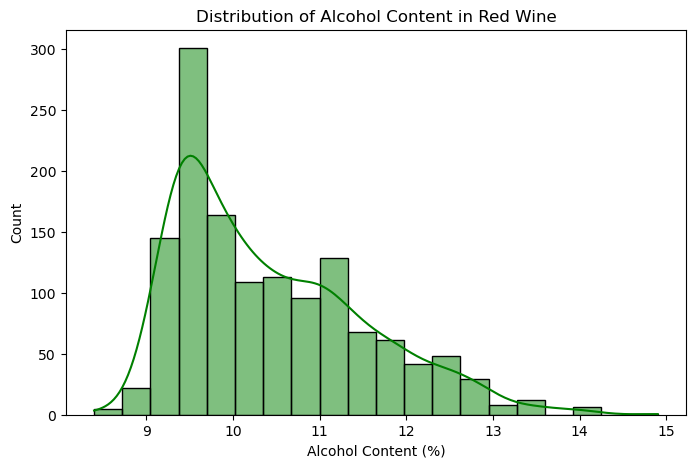

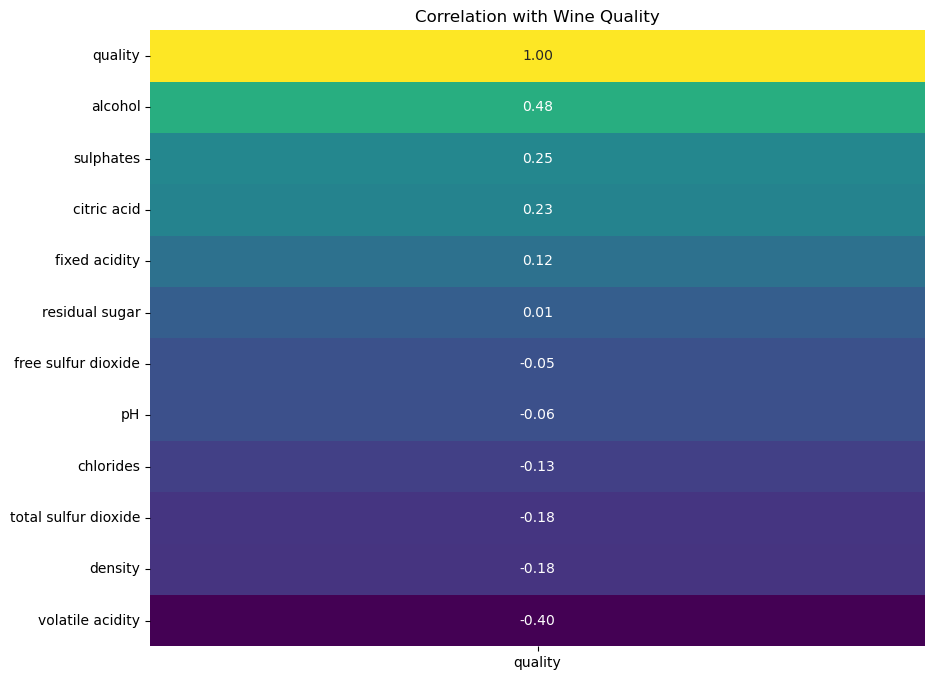

In [21]:
#  Data Visualization

# Countplot of quality scores (Equivalent to countplot of Pclass or Species)
plt.figure(figsize=(7, 5))
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality Scores")
plt.savefig('wine_quality_countplot.png')
plt.show()

# Histogram of Alcohol Content (Equivalent to histogram of Age or Petal Length)
plt.figure(figsize=(8, 5))
sns.histplot(df['alcohol'], bins=20, kde=True, color='green')
plt.title("Distribution of Alcohol Content in Red Wine")
plt.xlabel("Alcohol Content (%)")
plt.savefig('wine_alcohol_hist.png')
plt.show()

# Heatmap of correlation (Equivalent to correlation heatmap for all features)
corr = df.corr()
plt.figure(figsize=(10, 8))
# Only show correlations with the target variable 'quality'
sns.heatmap(corr[['quality']].sort_values(by='quality', ascending=False), 
            annot=True, 
            cmap='viridis', 
            fmt=".2f",
            cbar=False)
plt.title("Correlation with Wine Quality")
plt.savefig('wine_quality_correlation_heatmap.png')
plt.show()

## Insights

Data Cleaning: 240 duplicate rows were removed, leaving 1359 unique samples with no missing values.

Quality Distribution: The vast majority of wines are rated average (scores of 5 and 6), with high-quality (8) and low-quality (3, 4) wines being rare.

Chemical vs. Quality: Higher quality wines have higher alcohol and sulphates but significantly lower volatile acidity.

Key Predictors: Alcohol (positive) and volatile acidity (negative) are the two strongest chemical predictors of wine quality.

# 4

### Goal:
## Explore the Pima Indians Diabetes dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn 🩸

In [22]:
# import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [24]:

 ## Data Loading  

# Define column names
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv("C:/Users/Admin/Downloads/pima-indians-diabetes.csv", header=None, names=col_names)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
# Data cleaning

# Replace 0s with NaN in columns where 0 is invalid
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

# Display data status after cleaning
print("First 5 rows (after replacing 0s with NaN):")
print(df.head().to_markdown(index=False))
print("\nData Information (showing Null/NaN Counts):")
df.info()


First 5 rows (after replacing 0s with NaN):
|   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |   Insulin |   BMI |   DiabetesPedigreeFunction |   Age |   Outcome |
|--------------:|----------:|----------------:|----------------:|----------:|------:|---------------------------:|------:|----------:|
|             6 |       148 |              72 |              35 |       nan |  33.6 |                      0.627 |    50 |         1 |
|             1 |        85 |              66 |              29 |       nan |  26.6 |                      0.351 |    31 |         0 |
|             8 |       183 |              64 |             nan |       nan |  23.3 |                      0.672 |    32 |         1 |
|             1 |        89 |              66 |              23 |        94 |  28.1 |                      0.167 |    21 |         0 |
|             0 |       137 |              40 |              35 |       168 |  43.1 |                      2.288 |    33 |         1 |

Data Infor

In [26]:
# Data Analysis

# Calculate correlation of all features with the Outcome
correlation_matrix = df.corr()
outcome_corr = correlation_matrix['Outcome'].sort_values(ascending=False).round(4)
print("Correlation with Diabetes Outcome (1=Diabetic):")
print(outcome_corr.to_markdown(numalign="left", stralign="left"))

# Calculate mean of key metrics grouped by Outcome
mean_by_outcome = df.groupby('Outcome')[['Glucose', 'BMI', 'Age']].mean().round(2)
print("\nMean Metrics Grouped by Outcome:")
print(mean_by_outcome.to_markdown(numalign="left", stralign="left"))

Correlation with Diabetes Outcome (1=Diabetic):
|                          | Outcome   |
|:-------------------------|:----------|
| Outcome                  | 1         |
| Glucose                  | 0.4947    |
| BMI                      | 0.3137    |
| Insulin                  | 0.3035    |
| SkinThickness            | 0.2595    |
| Age                      | 0.2384    |
| Pregnancies              | 0.2219    |
| DiabetesPedigreeFunction | 0.1738    |
| BloodPressure            | 0.1706    |

Mean Metrics Grouped by Outcome:
| Outcome   | Glucose   | BMI   | Age   |
|:----------|:----------|:------|:------|
| 0         | 110.64    | 30.86 | 31.19 |
| 1         | 142.32    | 35.41 | 37.07 |


C:\Users\Admin\AppData\Local\Temp\ipykernel_7520\2591412744.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_by_outcome_glucose.index, y=mean_by_outcome_glucose.values, palette=['skyblue', 'salmon'], ax=axes[1])


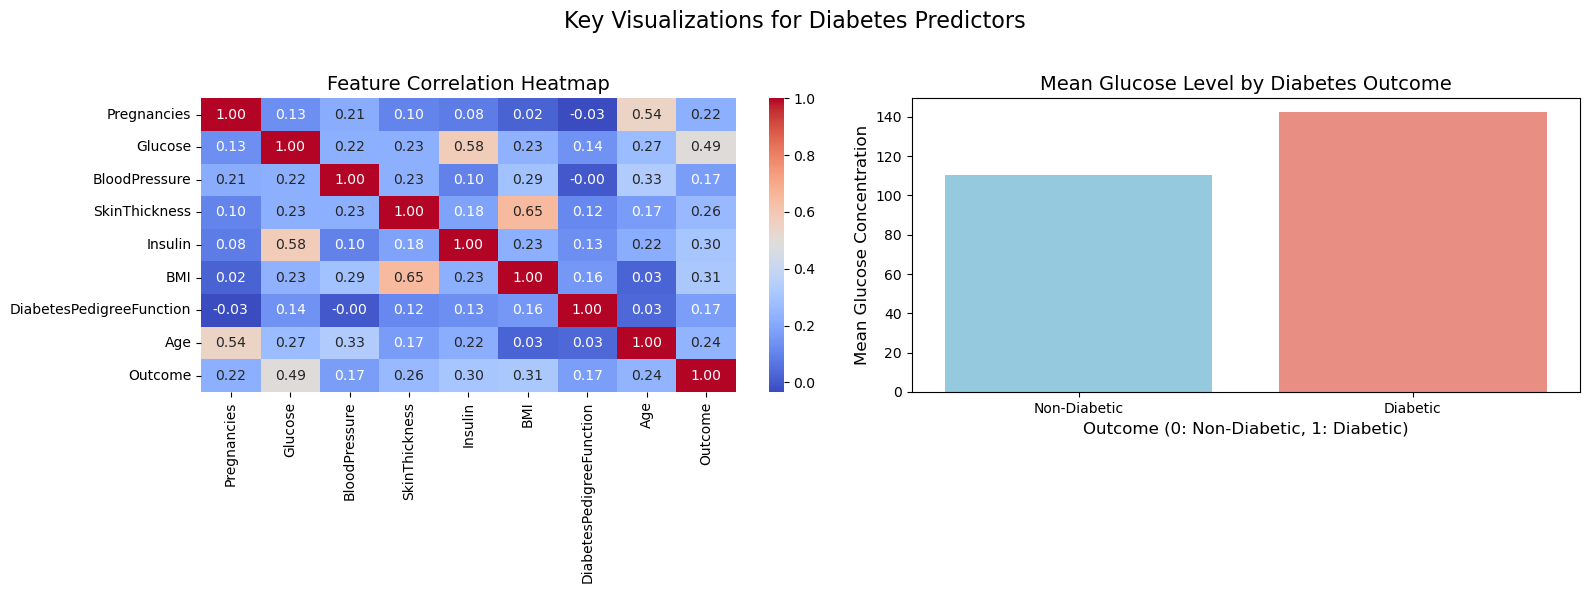

In [27]:
# Data Visualization

# Create a figure with two subplots: one for the heatmap and one for the bar plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Key Visualizations for Diabetes Predictors', fontsize=16)

# 1. Correlation Heatmap (Left Subplot)
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Feature Correlation Heatmap', fontsize=14)

# 2. Bar Plot of Mean Glucose by Outcome (Right Subplot)
# Group the data to get the mean glucose for each outcome
mean_by_outcome_glucose = df.groupby('Outcome')['Glucose'].mean().round(2)
sns.barplot(x=mean_by_outcome_glucose.index, y=mean_by_outcome_glucose.values, palette=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_title('Mean Glucose Level by Diabetes Outcome', fontsize=14)
axes[1].set_xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)', fontsize=12)
axes[1].set_ylabel('Mean Glucose Concentration', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Non-Diabetic', 'Diabetic'])

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout
plt.show()

### Insights

 ## Data Cleaning Insight
 1. The dataset contains 768 patient records, but 374 are missing Insulin data, indicating a high volume of incomplete records for this feature.

 2. Data Analysis (Statistics) Insight
Glucose is the strongest predictor (0.49 correlation), with diabetic patients showing significantly higher mean Glucose (142.32) and BMI (35.41) levels.

3. Data Visualization Insight
The heatmap confirms the high correlation of Glucose with the Outcome and reveals strong multicollinearity between SkinThickness and BMI (0.67).